# Lecture 12

1. Review some stuff from last time
2. Fix out problems
3. Examples

### Recap what we did last week. 
We wanted to solve the spacial part of the Schrodenger equation.
\begin{equation}
	\frac{-\hbar^2}{2m}\frac{d^2\phi}{dx^2} + U(x)\phi = E \phi
\end{equation}
Where $U=0$ inside the box and was infinite outside. We found that the solutions to this differential were

\begin{equation}
	\phi = A\sin kx
\end{equation}
inside the box, and zero outside. We found that the normalization constant $A$ was found by setting the total probability to 1

\begin{equation}
    1 = \int_{-\infty}^{\infty} |\phi|^2 dx
\end{equation}
Giving us $ A = \sqrt{2/L}$

#### Computational Problems
1. RK2 is set up to start at one boundry condition, but doesn't know how to force the other boundry condition. 
2. We have too many unknowns. When solving
    \begin{equation}
        \phi^{\prime\prime} = -k\phi
    \end{equation}
    we dont' know k or $\phi$
3. We we able to find the normalization analyticly, but the normalization constant wasn't found based on the differential equation or the boundry condtions. 

#### What do we do about this?
1. Pick a side and start there, for this problem we'll start at $\phi(0) = 0$.
2. We normally need a boundry condition for the derivative as well. We can analyticly find this, 

    \begin{equation}
        \phi^\prime = Ak\cos kx
    \end{equation}
    so $\phi^\prime(0) = Ak$. If we remember that A doesn't effect what energies we find, we can pick it to be what ever we want and it wont change our eigenvalues. Lets pick $A = 1/k$ so that $\phi^\prime(0) = 1$


We have 1 dependent variable 'x' and 2 independent variables $\phi$ and $\phi^\prime$ 

    w1 = phi
    w2 = dphi 
    dw1dx = w2
    dw2dx = -k**2 * w1
    
    # Initial conditions
    w0 = [0, 1]

#### The Trick
1. We want $\phi(L) = 0$,

    $\phi(L) = w1(L) = g(k)$
    
    If we plot out g(k) and look for where it is zero those are our eigenvalues,
2. We can pass the eigenvalue 'k' into rk2 as one of the elements of the "w" array. 
    
    w3(0) = k

3. We don't want this to change so i'll set it's derivative equal to zero,
    
    dw3dx = 0
    
    that way when this is passed to rk2 it doesn't change

In [1]:
def PIB(w, x):
    """
    Evaluates the functions describing the eigenmodes for a particle in a 1D quantum mechanical box.
    
    Inputs
    ----------
    w:  Array of dependent variables w = [phi, phi^\prime, k]
    x:  Independent variable, distance from the left side of the box (m)
    
    Output
    ----------
    f:  Array of the derivatives of the dependent variables
        f = [phi^\prime, phi^\prime\prime, dk/dx]
        
    Originally writen by Carla Riedel, modified for Python by Cody Brown
    """
    f0 = w[1] # Derivative of the wave function \phi
    f1 = -w[2]**2 * w[0] # Second derivative -k^2 phi
    f2 = 0 # This is our trick to make it so that the eigenvalue doesn't change,
    
    return np.array([f0, f1, f2])

In [2]:
def BC_PIB(k):
    """
    Evaluates the function descibing the eigenmode of a particle in a 1D QM box at
    the second boundry condition x = L
    
    Input
    ----------
    k:  Wave number 1/m
    Originally writen by Carla Riedel, modified for Python by Cody Brown
    """
    
    # Physical Paramiters of the problem
    L = 1e-10
    phi0 = 0.0
    dphi0 = 1.0
    w0 = [phi0, dphi0, k]
    
    
    #Integrate over our range
    t, w = rk2(w0, 0, L, 1e-12, PIB)
    
    return w[-1,0] # Returns phi(L)  
    

In [3]:
# %load '/home/cody/Physics 331/Textbook Programs/Chapter 5/rk2.py'
import numpy as np
def rk2(y0, t0, tf, dt, deriv_func):
    """
    General RK2 solver

    Inputs
    ----------
    y0:         Starting 'y' values. y0 Can be an array/list of any number of dimentions
    t0, tf:     Initial and Final independent variables
    dt:         Step size for the independent variable
    deriv_func: Derivative function that I want to solve for

    Output
    ----------
    t:  Array of independent variables
    y:  Array of dependent variables values. The first intex corresponds to the time step and the second corresponds to
        the dependent variable number
    """

    t = np.arange(t0, tf+dt, dt)
    n_steps = len(t)    # Number of steps to take

    y = np.zeros((n_steps, len(y0))) #Makes an array of zeros

    y[0,:] = y0 #Sets the first row in y to be the initial values.

    for n in range(n_steps-1):
        f = deriv_func(y[n,:],t[n])
        y_star = y[n,:] + 0.5 * dt * f
        #Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1,:] = (y[n,:] + dt*f_star)
    return t, y


In [4]:
# %load '/home/cody/Physics 331/Textbook Programs/Chapter 2/bisect.py'
import numpy as np
def bisect(func_name, xL, xR):
    """
    Find the solution the input equation f(x) = 0 for some input function. Start
    with the interval xL xR, and return a solution with a relative error
    0.5e-5.

    Inputs
    ----------
    func_name: This is the name of the function that I want to find roots for

    xL:        Smaller 'x' value I want to evaluate func_name at

    xR:        Higher 'x' value I want to evaluate func_name at

    Output
    ----------
    x_zero: 'x' value that returns func_name(x) = 0
    """
    fL = func_name(xL)
    fR = func_name(xR)
    #print("Function at the left: {} \nFunction at the right: {} ".format(fL, fR))
    if fL * fR > 0:     # Same sign on both sides
        return print("Both values give the same sign.") #Exit if inputs are wrong

    while np.abs( xR - xL ) > 1.0e-5 * np.max(np.abs([xL,xR])):
        xMP = 0.5*(xL + xR)
        fMP = func_name(xMP)

        if fMP == 0:       # Got lucky and found the root exactly
            return xMP

        if fMP * fR > 0:
            xR = xMP
            fR = fMP

        else:
            xL = xMP
            fL = fMP
    x_zero = 0.5 * (xL + xR)

    return x_zero


In [7]:
import matplotlib.pyplot as plt
import scipy.special as ss

def plotk():
    L = 1e-10
    k_list = np.linspace(0,4*np.pi/L, 200)
    g = np.zeros(200)
    for i in range(200):
        g[i] = BC_PIB(k_list[i])
    
    plt.figure(figsize = (10,8))
    plt.plot(k_list, g, '--', label = 'BC_PIB')
    plt.title('End point of the wavefunction as a function of "k"', size = 14)
    plt.xlabel('wave number k (1/m)', size = 14)
    plt.ylabel('$\phi(L)$', size = 14)
    plt.legend()
    plt.grid()

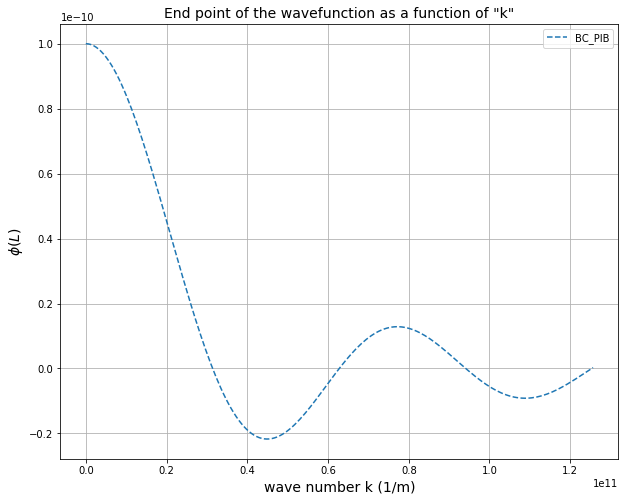

In [8]:
plotk()

Notice that this looks different from what you should have gotten in the homework you turned in. Why is that?

Because we set up our normalization constant, to also be dependent on 'k', we set up A = 1/k so as 'k' gets larger the amplitude of our wave gets smaller, but the location of the zeros stays the same

In [13]:
import matplotlib.pyplot as plt
def plot_gs():
    """
    Plots the ground state for the PIB porblem
    """
    L = 1e-10
    k1 = bisect(BC_PIB, 0.6e11, 0.8e11)
    x = np.linspace(0,L, 100)
    
    x2, w = rk2([0.0, 1.0, k1], 0, L, 1e-12, PIB)
    
    ka = 2*np.pi/L # Analytical eigenvalue
    phi = np.sin(ka * x) / ka # GS wave function, Remember that we picked our 'A' to be 1/k0
    
    plt.figure(figsize = (10,8))
    plt.plot(x, phi, label = 'Analytic Solution')
    plt.plot(x2, w[:, 0], '--', label = 'Numerical Solution')
    plt.xlabel('Distance (m)', size = 14)
    plt.title("Ground State for a Particle in a box", size = 14)
    plt.grid()
    plt.legend()

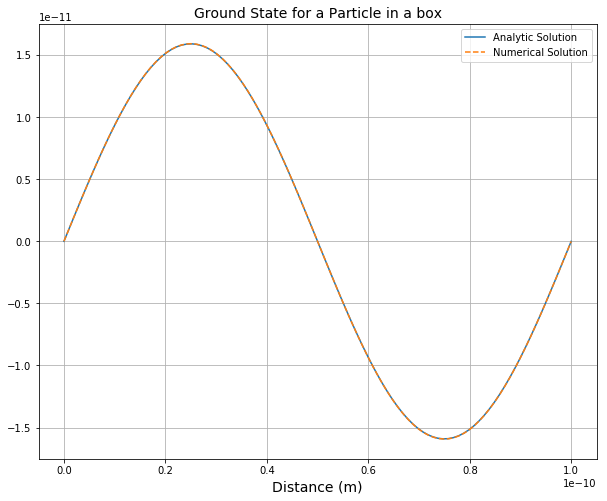

In [14]:
plot_gs()

### What about harder problems?
What if we take out infinite square well, but we add a step in the middle?

![title](IMG_20181114_142105040.jpg)

While this problem is just slightly different it is much harder to solve analyticly. You will do this problem in second semester quantum mechanics, but numerically this is real easy to handle. We just need to change our differential function and we can solve this just fine.

Our differential is,

\begin{align}
	\frac{d^2\phi}{dx^2} = -k^2 \phi \\
	\frac{d^2\phi}{dx^2} = -(k^2 -\alpha^2)\phi \\
    \alpha^2 = \frac{2mU_0}{\hbar^2}
\end{align}

Where the second part is for the region between a and b

In [30]:
def PIB_bump(w, x):
    """
    Evaluates the functions describing the eigenmodes for a particle in a 1D quantum mechanical box.
    
    Inputs
    ----------
    w:  Array of dependent variables w = [phi, phi^\prime, k]
    x:  Independent variable, distance from the left side of the box (m)
    
    Output
    ----------
    f:  Array of the derivatives of the dependent variables
        f = [phi^\prime, phi^\prime\prime, dk/dx]
        
    Originally writen by Carla Riedel, modified for Python by Cody Brown
    """
    alpha = 10e10 
    L = 1e-10
    
    a = L/3 # Left side of the bump (m)
    b = 2*L/3 # Right side of the bump (m)
    
    f0 = w[1]
    
    if (x < a) or (x > b):
        f1 = -w[2]**2 * w[0]
    else:
        f1 = -(w[2]**2 - alpha**2)*w[0]
    
    f2 = 0 # This is our trick to make it so that the eigenvalue doesn't change,
    
    return np.array([f0, f1, f2])

In [31]:
def BC_PIB_bump(k):
    """
    Evaluates the function descibing the eigenmode of a particle in a 1D QM box at
    the second boundry condition x = L
    
    Input
    ----------
    k:  Wave number 1/m
    Originally writen by Carla Riedel, modified for Python by Cody Brown
    """
    
    # Physical Paramiters of the problem
    L = 1e-10
    phi0 = 0.0
    dphi0 = 1.0
    w0 = [phi0, dphi0, k]
    
    
    #Integrate over our range
    t, w = rk2(w0, 0, L, 1e-12, PIB_bump) # Only thing we change is the differential is PIB_bump
    
    return w[-1,0] # Returns phi(L)  
    

In [32]:
import matplotlib.pyplot as plt
import scipy.special as ss
def plotk_bump():
    L = 1e-10
    k_list = np.linspace(0,4*np.pi/L, 200)
    g = np.zeros(200)
    gp = np.zeros(200)
    for i in range(200):
        g[i] = BC_PIB(k_list[i])
        gp[i] = BC_PIB_bump(k_list[i])
    
    plt.figure(figsize = (10,8))
    plt.plot(k_list, g, '--', label = 'BC_PIB')
    plt.plot(k_list, gp, '--', label = 'BC_PIB_bump')
    plt.title('End point of the wavefunction as a function of "k"', size = 14)
    plt.xlabel('wave number k (1/m)', size = 14)
    plt.ylabel('$\phi(L)$', size = 14)
    plt.legend()
    plt.grid()

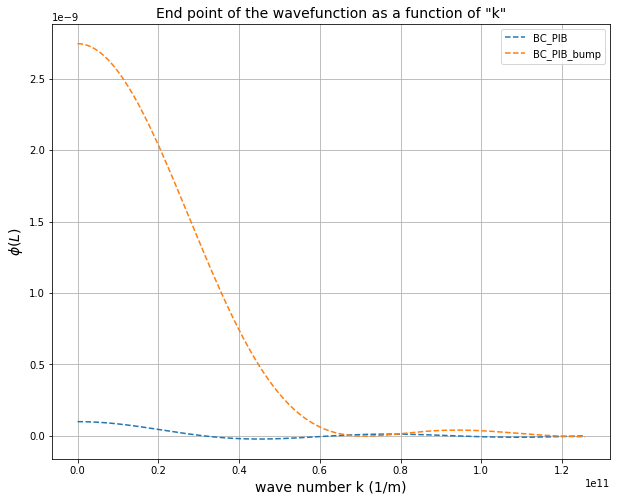

In [33]:
plotk_bump()

In [38]:
import matplotlib.pyplot as plt
def plot_gs_bump():
    """
    Plots the ground state for the PIB porblem
    """
    L = 1e-10
    k1 = bisect(BC_PIB, 0.2e11, 0.4e11)
    k1_bump = bisect(BC_PIB_bump, 0.6e11, 0.7e11)
    x = np.linspace(0,L, 100)
    
    x2, w = rk2([0.0, 1.0, k1], 0, L, 1e-12, PIB)
    x_bump, w_bump = rk2([0.0, 1.0, k1_bump], 0, L, 1e-12, PIB_bump)
    
    #ka = np.pi/L
    #phi = np.sin(ka * x) / ka # GS wave function, Remember that we picked our 'A' to be 1/k0
    
    plt.figure(figsize = (10,8))
    plt.plot(x_bump, w_bump[:,0], label = 'ISW with a bump')
    plt.plot(x2, w[:, 0], '--', label = 'Infinite Square well')
    plt.xlabel('Distance (m)', size = 14)
    plt.title("Ground State for a Particle in a box", size = 14)
    plt.vlines(L/3, 0, 2e-11, label = 'a = L/3')
    plt.vlines(2*L/3, 0, 2e-11, label = 'b = 2L/3')
    plt.hlines(2e-11, L/3, 2*L/3)
    plt.grid()
    plt.legend()

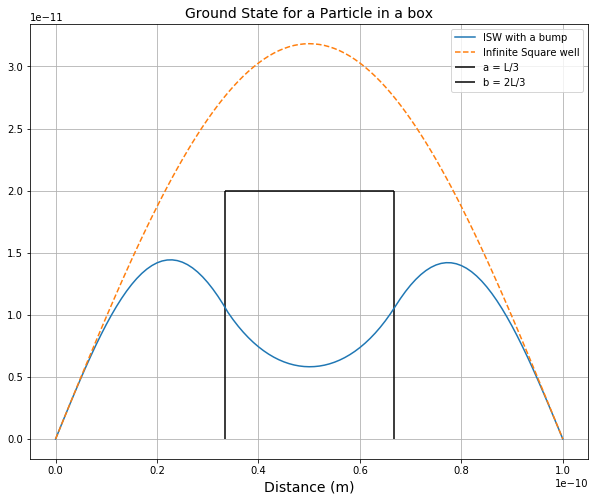

In [39]:
plot_gs_bump()